In [25]:
#encoding="utf-8"
import pandas as pd
import time 
import json
import requests
import numpy as np

In [262]:
# 获取火币或者T8或者币安历史合约K线数据
def get_future_klinedata0(platform, symbol):
    if platform == 'huobi':
        try:
            now = int(time.time())
            start_time = now - 86400*2000
            contract_code = "{}-usdt".format(symbol).upper()
            url = huobifuture_api_url + '/linear-swap-ex/market/history/kline?contract_code={}&period=1day&from={}&to={}'.format(
                contract_code, start_time, now)
            res = requests.get(url)
            resdict = json.loads(res.content.decode())
            df = pd.DataFrame()
            df['close'] = [i['close'] for i in resdict['data']]
            df['high'] = [i['high'] for i in resdict['data']]
            df['low'] = [i['low'] for i in resdict['data']]
            df['open'] = [i['open'] for i in resdict['data']]
        except Exception as e:
            df = pd.DataFrame()
        finally:
            return df
    elif platform == "T8ex":
        try:
            contract_id_dict = {'BTC': 1, 'ETH': 2, 'LINK': 3, 'EOS': 4, 'FIL': 5, 'LTC': 6, 'UNI': 7, 'DOT': 8,
                                'DOGE': 9}
            contract_id = contract_id_dict[symbol.upper()]
            now = int(time.time())
            start_time = now - 86400*2000
            url = T8ex_kline_url + "?contractId={}&from={}&to={}&resolution={}".format(contract_id, start_time * 1000,
                                                                                       now * 1000,
                                                                                       "1D")
            res = requests.get(url).json()
            df = pd.DataFrame()
            df['close'] = [i[4] for i in res]
            df['high'] = [i[2] for i in res]
            df['low'] = [i[3] for i in res]
            df['open'] = [i[1] for i in res]
        except Exception as e:
            df = pd.DataFrame()
        finally:
            return df

    elif platform == "binance":
        try:
            url = 'https://dapi.binance.com/dapi/v1/continuousKlines'
            pair = "{}usd".format(symbol).upper()
            now = int(time.time())
            start_time = now - 86400 * 2000
            data = {'pair': pair, 'contractType': "PERPETUAL", 'interval': '1d', 'starttime': start_time * 1000,
                    'endtime': now * 1000}
            res = requests.get(url, params=data, timeout=1).json()
            df = pd.DataFrame()
            df['high'] = [i[2] for i in res]
            df['low'] = [i[3] for i in res]
            df['close'] = [i[4] for i in res]
        except Exception as e:
            df = pd.DataFrame()
        finally:
            return df

In [263]:
T8ex_kline_url="http://47.241.181.195:1060/contract-market/history"
huobifuture_api_url='https://api.btcgateway.pro'

In [248]:
df=get_future_klinedata0("T8ex","btc")

In [249]:
close_array=df['close'].values.tolist()

In [250]:
close_array

[0.002971,
 0.002879,
 0.002975,
 0.002944,
 0.002937,
 0.003184,
 0.003103,
 0.003122,
 0.00357,
 0.003254,
 0.003336,
 0.003378,
 0.003247,
 0.00308,
 0.002944,
 0.00302,
 0.00309,
 0.003037,
 0.002979,
 0.003021,
 0.002972,
 0.003049,
 0.003039,
 0.003013,
 0.003102,
 0.00321,
 0.003116,
 0.003089,
 0.00306,
 0.00309,
 0.003169,
 0.003292,
 0.003287,
 0.003303,
 0.003308,
 0.00329,
 0.003099,
 0.003539,
 0.003341,
 0.00326,
 0.00309,
 0.003195,
 0.003153,
 0.003321,
 0.003703,
 0.003653,
 0.003464,
 0.003474,
 0.003432,
 0.003355,
 0.003144,
 0.003236,
 0.003195,
 0.002987,
 0.003003,
 0.003024,
 0.00287,
 0.003028,
 0.002965,
 0.003078,
 0.003021,
 0.002951,
 0.002848,
 0.002871,
 0.0029,
 0.002879,
 0.002773,
 0.002797,
 0.002794,
 0.002802,
 0.002864,
 0.002832,
 0.002917,
 0.00288,
 0.00292,
 0.003071,
 0.002956,
 0.002909,
 0.002887,
 0.002862,
 0.002811,
 0.002871,
 0.00285,
 0.002812,
 0.002786,
 0.002617,
 0.002619,
 0.002635,
 0.002693,
 0.002784,
 0.002718,
 0.002598,
 0.0

In [251]:
a=0.05
llt=[close_array[0],close_array[1]]

In [252]:
for i in range(len(close_array))[3:]:
    LLT1=llt[-1]
    LLT2=llt[-2]
    close =close_array[i - 3 + 1:i + 1]
    # LLT=(a-(a**2)/4)*h['close'].values[-1]+(a**2)/2*h['close'].values[-2]-(a-(3/4)*(a**2))*h['close'].values[-3]+2*(1-a)*LLT1-(1-a)**2*LLT2
    p=(a-(a**2)/4)*close[-1]+(a**2)/2*close[-2]-(a-(3/4)*(a**2))*close[-3]+2*(1-a)*LLT1-(1-a)**2*LLT2
    llt.append(p)

In [253]:
df=df.iloc[1:]
df['llt']=llt

In [254]:
df

,close,high,low,open,llt
1,0.002879,0.002977,0.002799,0.002972,0.002971
2,0.002975,0.003005,0.002858,0.002874,0.002879
3,0.002944,0.003044,0.002874,0.002976,0.002799
4,0.002937,0.002998,0.002900,0.002943,0.002726
5,0.003184,0.003220,0.002929,0.002936,0.002672
...,...,...,...,...,...
795,0.194543,0.204500,0.191051,0.195055,0.182376
796,0.219302,0.233000,0.192420,0.194563,0.182542
797,0.202893,0.228157,0.195110,0.219278,0.183165
798,0.206313,0.213900,0.197192,0.202980,0.183155


In [255]:
df['llt_shift']=df['llt'].shift()

In [256]:
df

,close,high,low,open,llt,llt_shift
1,0.002879,0.002977,0.002799,0.002972,0.002971,NaN
2,0.002975,0.003005,0.002858,0.002874,0.002879,0.002971
3,0.002944,0.003044,0.002874,0.002976,0.002799,0.002879
4,0.002937,0.002998,0.002900,0.002943,0.002726,0.002799
5,0.003184,0.003220,0.002929,0.002936,0.002672,0.002726
...,...,...,...,...,...,...
795,0.194543,0.204500,0.191051,0.195055,0.182376,0.183552
796,0.219302,0.233000,0.192420,0.194563,0.182542,0.182376
797,0.202893,0.228157,0.195110,0.219278,0.183165,0.182542
798,0.206313,0.213900,0.197192,0.202980,0.183155,0.183165


In [257]:
df['buy']=np.where(df['llt']>df['llt_shift']*1.005,1,0)


In [258]:
df['sell']=np.where(df['llt']<0.995*df['llt_shift'],1,0)

In [259]:
buy_list=df['buy'].values.tolist()
sell_list=df['sell'].values.tolist()

In [260]:
#单向交易
flag=0
direction=[]
for i in range(len(buy_list)):
    if flag==0:#没有持仓
        if buy_list[i]==1 :
            direction.append(1)
            flag=1
        else:
            direction.append(0)
    elif flag==1:#持有多仓
        if sell_list[i]==1:
            direction.append(0)
            flag=0
        else:
            direction.append(1)
            flag=1

<AxesSubplot:>

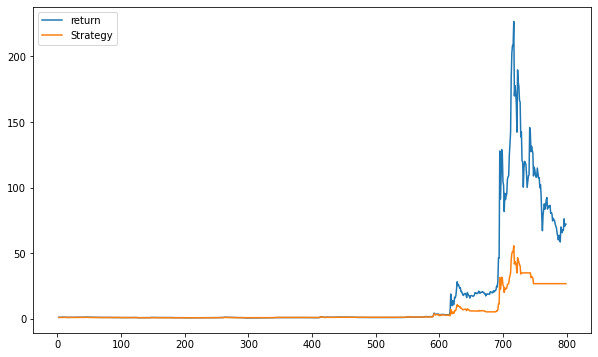

In [261]:
df.loc[:,'return']=np.log(df['close']/df['close'].shift())
df.loc[:,'direction']=np.array(direction)
df.loc[:,'Strategy']=df['direction'].shift()*df['return']*1
df[['return','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))